# ***Unsupervised Learning (Clustering)***

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
house_data=pd.read_csv(f'house_data_to_modeling.csv')
house_data.drop('Unnamed: 0' , axis=1 , inplace=True)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,month_sold,house_age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,5,59
1,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,5,48
2,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,5,51
3,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,5,38
4,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,5,76


### ***Clustering Experiments***

In [29]:
from sklearn.preprocessing import LabelEncoder
house_data_Encoded = house_data.copy()
house_data_Encoded.drop(columns=['statezip'] , inplace=True)


encoder_street_cluster= LabelEncoder()
house_data_Encoded['street'] = encoder_street_cluster.fit_transform(house_data_Encoded['street'])
encoder_city_cluster= LabelEncoder()
house_data_Encoded['city'] = encoder_city_cluster.fit_transform(house_data_Encoded['city'])


house_data_scaling = house_data_Encoded.copy()
scaler_cluster = StandardScaler()
house_data_scaling = scaler_cluster.fit_transform(house_data_scaling)

from sklearn.decomposition import PCA
house_data_p = house_data_scaling.copy()
pca = PCA(2)
principal_components = pca.fit_transform(house_data_p)
house_data_pca = pd.DataFrame(principal_components)

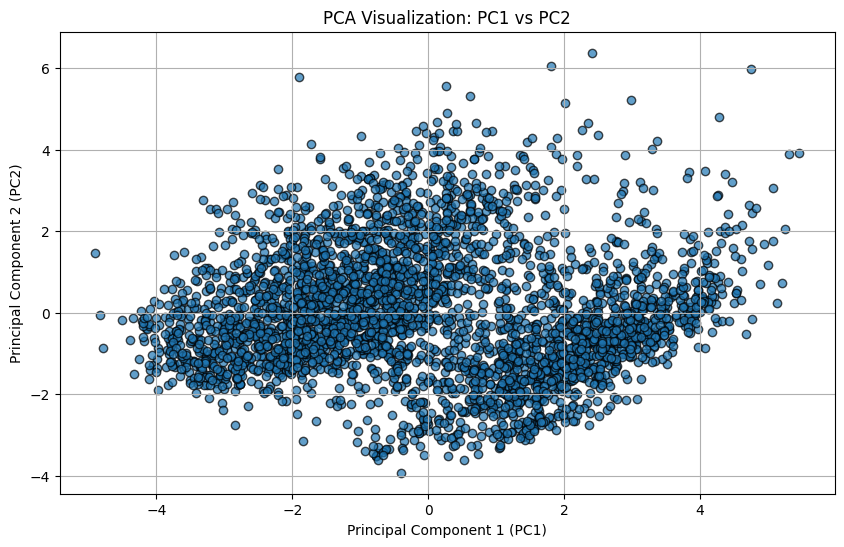

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(house_data_pca[0], house_data_pca[1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Visualization: PC1 vs PC2")
plt.grid(True)
plt.show()

### **Hierarchical Model**

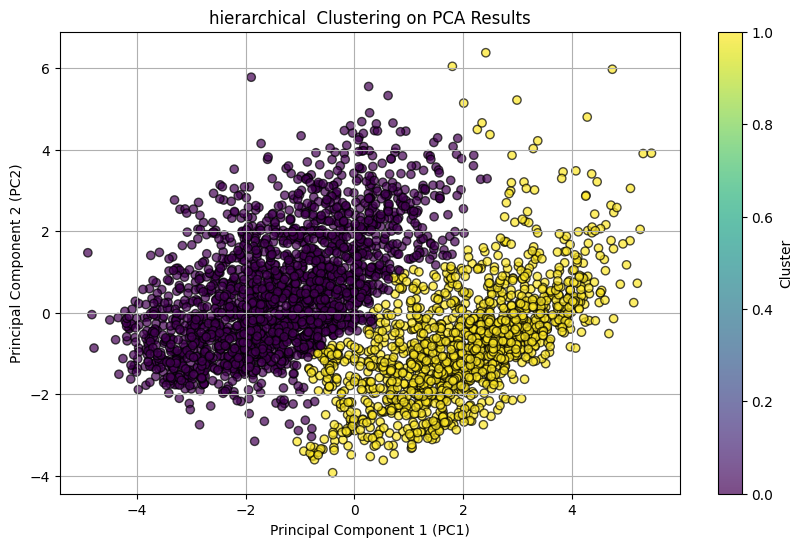

In [31]:
from sklearn.cluster import AgglomerativeClustering
data_Agglo = house_data_pca.copy()

model_hierarchical  = AgglomerativeClustering(n_clusters=2)
data_Agglo["Cluster"] = model_hierarchical.fit_predict(data_Agglo)


plt.figure(figsize=(10, 6))
plt.scatter(data_Agglo[0], data_Agglo[1], c=data_Agglo["Cluster"], cmap="viridis", alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("hierarchical  Clustering on PCA Results")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [32]:
data_Agglo['Cluster'].value_counts()

Cluster
0    2114
1    1463
Name: count, dtype: int64

**Hierarchical Clustering produced the best and most meaningful segmentation of the dataset. After removing outliers, the data showed a clear structure and the algorithm successfully divided the properties into two well-separated clusters. These two clusters represent two distinct segments of the housing market, most likely a lower-priced segment and a higher-priced segment. This result is also visually clear after applying PCA for visualization**

In [33]:
house_data['cluster'] = data_Agglo['Cluster']

In [34]:
house_data.groupby('cluster').mean(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month_sold,house_age
cluster,,,,,,,,,,,,,,,
0,441525.288824,3.184957,1.699622,1675.849101,7647.362819,1.151372,0.000946,0.155156,3.699622,1305.278146,370.570956,1950.039735,1088.107852,5.740776,63.960265
1,497716.147295,3.411483,2.489405,2173.155844,6363.804511,1.967874,0.001367,0.099111,3.106630,2063.347915,109.807929,1998.280246,435.457280,5.778537,15.719754


# ***Category Classification***

### ***Classification Experiments***

In [35]:
house_data['cluster'].value_counts()

cluster
0    2114
1    1463
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

class_data = house_data.copy()
class_data.drop(columns=['street','statezip'] , inplace=True)

encoder_city_class = LabelEncoder()
class_data['city'] = encoder_city_class.fit_transform(class_data['city'])

x = class_data.drop('cluster' , axis=1)
y = class_data['cluster']

scaler_classification = StandardScaler()
x_scaled = scaler_classification.fit_transform(x)

### **SVC**

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_SVC = SVC()
y_pred = cross_val_predict(model_SVC, x_scaled, y, cv=kf)
scores = cross_val_score(model_SVC, x_scaled, y, cv=kf, scoring='accuracy')


results_df = pd.DataFrame({
    "Model": ["SVC"],
    "Accuracy": [scores.mean()]
})

print(results_df , '\n\n')
print(classification_report(y, y_pred))

# تدريب حقيقى للموديل
model_SVC.fit(x_scaled, y)

  Model  Accuracy
0   SVC  0.980989 


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2114
           1       0.98      0.97      0.98      1463

    accuracy                           0.98      3577
   macro avg       0.98      0.98      0.98      3577
weighted avg       0.98      0.98      0.98      3577



,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


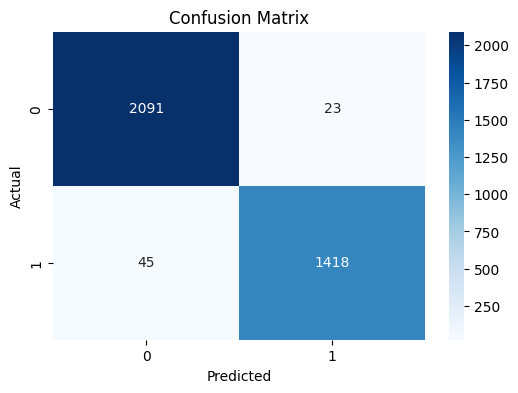

In [38]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**SVM was selected as the final classification model for predicting the property category**

# ***Price Regression Modeling***

In [39]:
data_regression = house_data.copy()
data_regression.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,month_sold,house_age,cluster
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,5,59,0
1,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,5,48,0
2,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,5,51,0
3,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,5,38,0
4,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,5,76,0


In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder_statezip_regression = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

statezip_encoded = encoder_statezip_regression.fit_transform(data_regression[['statezip']])

statezip_cols = encoder_statezip_regression.get_feature_names_out(['statezip'])

statezip_df = pd.DataFrame(statezip_encoded, columns=statezip_cols, index=data_regression.index)

data_regression = pd.concat([data_regression.drop(columns=['statezip']), statezip_df], axis=1)

In [41]:
x = data_regression.drop(columns=['price','yr_built','yr_renovated','street','city','cluster'])
y = data_regression['price']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
(x_train.shape, x_test.shape),( y_train.shape, y_test.shape)

(((2861, 87), (716, 87)), ((2861,), (716,)))

In [44]:
from sklearn.preprocessing import StandardScaler
scaler_regression = StandardScaler()
x_train_scaled = scaler_regression.fit_transform(x_train)
x_test_scaled = scaler_regression.transform(x_test)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,mean_absolute_percentage_error
model_ridge = Ridge()
model_ridge.fit(x_train_scaled, y_train)
y_pred_test = model_ridge.predict(x_test_scaled)

mae_linear = mean_absolute_error(y_test, y_pred_test)
mse_linear = mean_squared_error(y_test, y_pred_test)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_test)

print(f"Ridge \n MAE: {mae_linear:.2f}\n MSE: {mse_linear:.2f}\n RMSE: {rmse_linear:.2f}\n R2: {r2_linear*100:.2f} %")

Ridge 
 MAE: 61401.40
 MSE: 7597037027.83
 RMSE: 87160.98
 R2: 81.83 %


**Ridge Regression (Final Model):**

**Selected as the final model because it achieves the best trade-off between bias and variance. It provides stable and consistent performance with excellent generalization (Test MAE ≈ 61k, R² ≈ 0.82). Ridge regression is also robust to multicollinearity caused by one-hot encoded location features, making it more reliable and safer than standard linear regression for this problem.**

***This demonstrates that in this problem, better features are more important than more complex models***

# **LLM-based Model Interpretation**

### **API**

In [ ]:
house_features= {
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Living area": 2000,
    "Lot area": 5000,
    "Floors": 2,
    "Waterfront": 0,
    "View": 1,
    "Condition": 3,
    "Sqft above": 1800,
    "Sqft basement": 200,
    "StateZip": "WA98052",
    "Month sold": 5,
    "House age": 10
}
predicted_price = 600000

In [ ]:
import requests
import os

GROQ_API_KEY = os.getenv('GROQ_API_KEY')
url = "https://api.groq.com/openai/v1/chat/completions"

headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json"
}

prompt = f"""
You are a real estate expert.

A machine learning model predicted the house price as ${predicted_price}.

House details:
{chr(10).join([f"- {k}: {v}" for k,v in house_features.items()])}

"""

chat_history = [
    {"role": "system", "content":prompt}
]


user_input = """
Answer both questions exactly:
question1 : Why was this price predicted ? based on the house features.
question2 : Is it realistic compared to the market? Explain why?

Rules:
- Do NOT repeat the question.
- Do NOT add any extra text.
"""


chat_history.append({"role": "user", "content": user_input})

data = {
        "model": "llama-3.3-70b-versatile",
        "messages": chat_history,
        "temperature": 0.3
    }

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:
        reply = response.json()["choices"][0]["message"]["content"]
        chat_history.append({"role": "assistant", "content": reply})
        print(f"🤖 Bot: {reply}\n")
else:
        print(f"[Error] {response.status_code}: {response.text}")


🤖 Bot: The predicted price of $600000 can be attributed to the house's desirable features, including its 3 bedrooms, 2 bathrooms, and 2000 square feet of living area, which provide ample space for a family. The lot area of 5000 square feet offers a decent outdoor space, and the 2 floors provide a sense of openness. The view feature, rated as 1, suggests a pleasant outlook, and the condition rating of 3 indicates a well-maintained property. The location, WA98052, is also a factor, as Washington state, particularly the 98052 zip code, is known for its high demand and limited supply of housing, driving up prices. The sqft above and sqft basement also contribute to the overall value, providing a total living area of 2000 square feet.

The predicted price of $600000 seems realistic compared to the market, considering the location, size, and features of the house. The Washington state market, especially in the 98052 zip code, tends to have higher prices due to its proximity to major cities a

# **Saved Models**

In [46]:
import joblib

# Save models
joblib.dump(model_SVC, "model_SVC.pkl")
joblib.dump(model_ridge, "model_ridge.pkl")

# Save scalers
joblib.dump(scaler_classification, "scaler_classification.pkl")
joblib.dump(scaler_regression, "scaler_regression.pkl")

# Save encoders
joblib.dump(encoder_city_class, "encoder_city_class.pkl")
joblib.dump(encoder_statezip_regression, "encoder_statezip_regression.pkl")

print(" Models, scalers, and encoders saved successfully!")

 Models, scalers, and encoders saved successfully!
